In [58]:
# baseline apporach of Gatev Goetzmann and Rouwenhorst
#Creation of stonks
# minimum eucladioan squared distance (SSD)
# threshold - 2 std
# result

In [70]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bits = np.random.binomial(1,0.001,(3000,))

In [3]:
index = []
j = 0
for i in bits:
    if int(i) == 1:
        index.append(j)
    j +=1

In [4]:
index

[1548, 2592]

In [5]:
for i in range(len(index)):
    print(bits[i])

0
0


<AxesSubplot:>

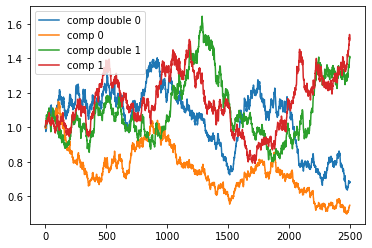

In [82]:
stonks = pd.DataFrame()
pair = pd.DataFrame()

years = 10
days = 250 *  years

n_comp = 2

for i in range(n_comp):
    mean = np.random.normal(0,0.0001)*0
    pair["nmb "+str(i)] = np.random.normal(mean,0.01, (days,)) + 1
    eps =  np.random.normal(mean,0.005, (days,))
    stonks["comp double "+str(i)] = pair["nmb "+str(i)] + eps
    stonks["comp "+str(i)] = pair["nmb "+str(i)] - eps

stonks = stonks.cumprod()
stonks.plot()

In [208]:
# sum squared distance (SSD)

SSD = pd.DataFrame()
for j in range(len(stonks.columns)):
    base = stonks.iloc[:,j]
    SSD["stonk "+str(j)] = [((base - stonks.iloc[:,i] )**2).sum() for i in range(len(stonks.columns))]

SSD = SSD.where(SSD != 0, np.nan)

Pear = stonks.corr()
Pear = Pear.where(Pear != 1,np.nan)

,stonk 0,stonk 1,stonk 2,stonk 3
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,68.707874
3,NaN,NaN,68.707874,NaN


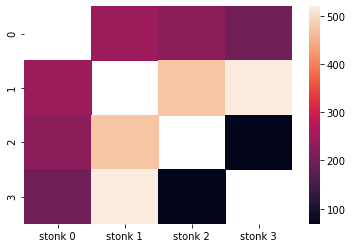

In [209]:
sns.heatmap(SSD)
SSD[SSD == SSD.min().min()]
# ebst is lowest

,comp double 0,comp 0,comp double 1,comp 1
comp double 0,NaN,0.778254,NaN,NaN
comp 0,0.778254,NaN,NaN,NaN
comp double 1,NaN,NaN,NaN,NaN
comp 1,NaN,NaN,NaN,NaN


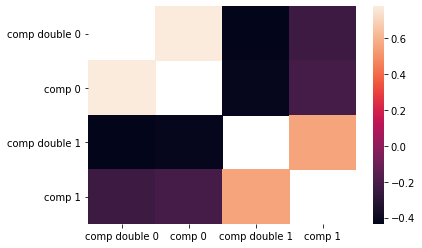

In [212]:
sns.heatmap(Pear)
Pear[Pear == Pear.max().max()]
#best is highest

In [89]:
SSD[SSD == SSD.min().min()].dropna(axis=1, how="all").dropna(axis=0, how="all")

,stonk 2,stonk 3
2,NaN,68.707874
3,68.707874,NaN


In [214]:
# pick combo of best stonks
select = SSD[SSD == SSD.min().min()].dropna(axis=1, how="all").dropna(axis=0, how="all")
select = pd.Series([0,1])

select_pairs = pd.DataFrame()
select_pairs["p1"] = stonks.iloc[:,int(select.index[0] / 2-0.5)]
select_pairs["p2"] = stonks.iloc[:,int(select.index[1] / 2-0.5)]
select_pairs

,p1,p2
0,1.002790,1.002790
1,1.009557,1.009557
2,0.986224,0.986224
3,0.975157,0.975157
4,0.988622,0.988622
...,...,...
2495,0.681666,0.681666
2496,0.679031,0.679031
2497,0.684287,0.684287
2498,0.676518,0.676518


<AxesSubplot:>

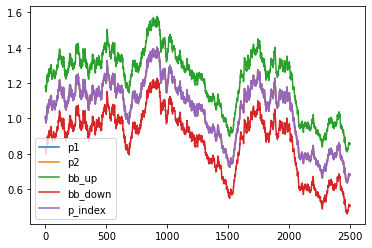

In [215]:

portfolio = select_pairs.copy()

ms = 1
portfolio["bb_up"] = select_pairs.mean(axis=1).std() * ms + select_pairs.mean(axis=1)
portfolio["bb_down"] = select_pairs.mean(axis=1).std() * ms * -1 + select_pairs.mean(axis=1)
portfolio["p_index"] = select_pairs.mean(axis=1)
portfolio.append(select_pairs)
portfolio.plot()

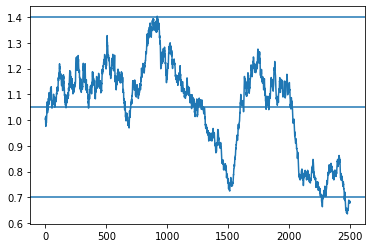

<AxesSubplot:>

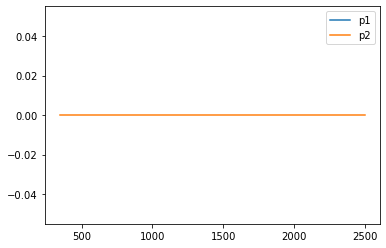

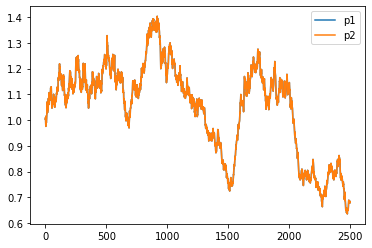

In [216]:
portfolio["p_index"].plot()
plt.axhline(portfolio["p_index"].std()*2 + portfolio["p_index"].mean())
plt.axhline(portfolio["p_index"].std()*-2 + portfolio["p_index"].mean())
plt.axhline( portfolio["p_index"].mean())
plt.show()
select_pairs.diff(axis=1).abs()[pos].plot()
select_pairs.plot()

<AxesSubplot:>

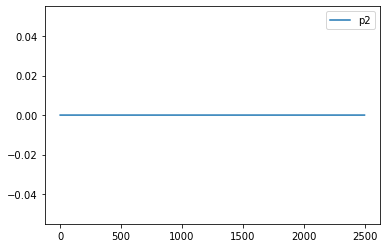

In [217]:
#position

pos = portfolio["p_index"].gt(portfolio["p_index"].mean() - portfolio["p_index"].std()*2, axis=0) & portfolio["p_index"].lt(portfolio["p_index"].mean(), axis=0)

positions = select_pairs.diff(axis=1).dropna(how="all",axis=1).abs().pct_change().where(pos).fillna(0).cumsum()*-1
positions.plot()


In [218]:
select_pairs.diff(axis=1).abs().dropna(how="all",axis=1).where(pos)

,p2
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
2495,NaN
2496,NaN
2497,NaN
2498,NaN


In [219]:
select_pairs.diff(axis=1)

,p1,p2
0,NaN,0.0
1,NaN,0.0
2,NaN,0.0
3,NaN,0.0
4,NaN,0.0
...,...,...
2495,NaN,0.0
2496,NaN,0.0
2497,NaN,0.0
2498,NaN,0.0


array([[<AxesSubplot:title={'center':'comp double 0'}>,
        <AxesSubplot:title={'center':'comp 0'}>],
       [<AxesSubplot:title={'center':'comp double 1'}>,
        <AxesSubplot:title={'center':'comp 1'}>]], dtype=object)

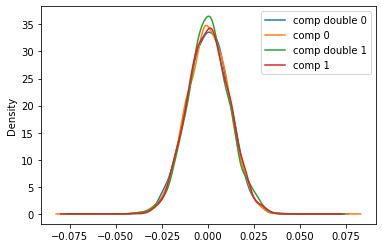

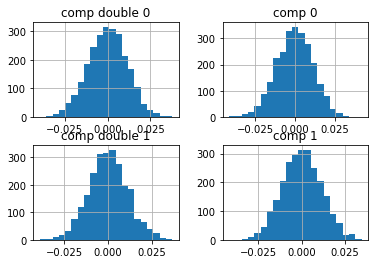

In [220]:
stonks.pct_change().plot.kde()
stonks.pct_change().hist(bins=21)

<AxesSubplot:>

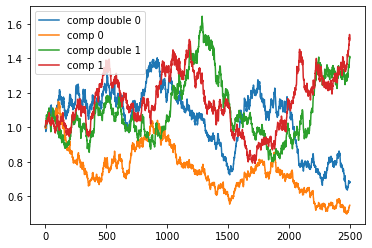

In [221]:
stonks.plot()

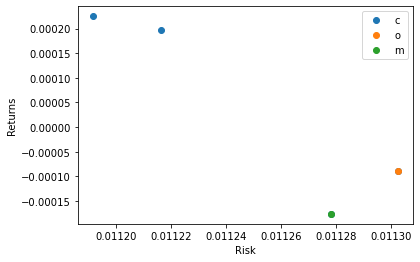

In [222]:
risk = stonks.pct_change().std()
returns = stonks.pct_change().mean()

totals = pd.DataFrame(returns, columns = ["returns"])
totals["risk"] = risk
totals.index = stonks.columns.values

plt.plot(risk ,returns,"o")

for i in range(n_comp):
    plt.plot(risk.iloc[i], returns.iloc[i],'o')
    plt.xlabel("Risk")
    plt.ylabel("Returns")
    plt.legend(str(list(stonks.columns.values)[i]))
    


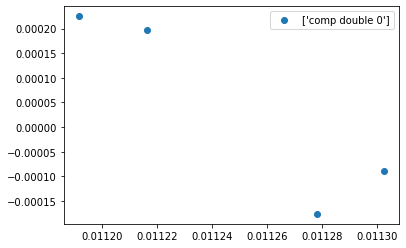

In [223]:
plt.plot(risk,returns,"o")
plt.legend([[i] for i in list(stonks.columns.values)])

In [224]:
z_score = stonks.div( stonks.iloc[:,0],axis=0)

<AxesSubplot:>

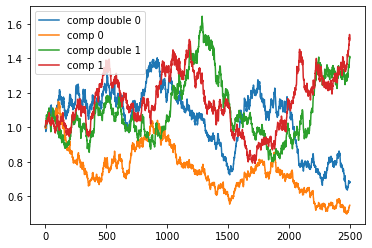

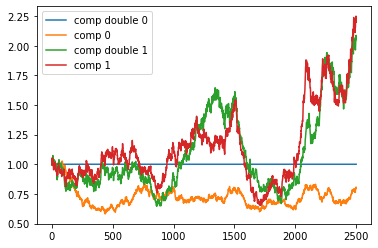

In [225]:
stonks.plot()
z_score.plot()

In [226]:
import seaborn as sns



[]

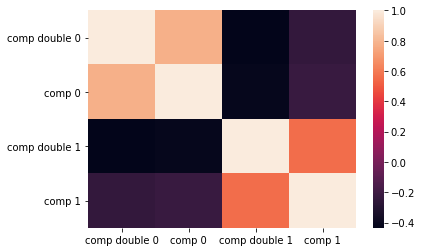

In [227]:
sns.heatmap(stonks.corr())
plt.plot()


<AxesSubplot:>

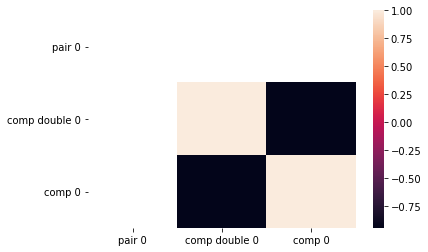

In [57]:
sns.heatmap(z_score.corr())